<table style="border: 1px solid white !important;">
    <tr>
        <td>
            <div align="center"><h3><u>1990</u></h3></div>
            <br />
            <img src="https://images.procon.org/wp-content/uploads/sites/15/1990-us-obesity-map.jpg" width="400" />
        </td>
        <td>
            <div align="center">
                <h1>Comparing Community Demographics<br />to Fast Food Appetites</h1>
                <h3>By: Richard Queen</h3>
                <h3>Coursera Data Science Capstone Project</h3>
            </div>
        </td>
        <td>
            <div align="center"><h3><u>2017</u></h3></div>
            <br />
            <img src="https://images.procon.org/wp-content/uploads/sites/15/2017-us-obesity-map.jpg" width="400" />
        </td>
    </tr>
</table>
<hr />

### Table of Contents
* [I. Introduction](#intro)
    * [A. Description & Discussion](#description)
    * [B. Data Sources Used](#data)
* [II. Methodology](#method)
* [III. Results](#results)
* [IV. Discussion](#discussion)
* [V. Conclusion](#conclusion)
* [VI. References](#references)

<div id="intro"><h1>I. Introduction</h1></div>

<div id="description"><h2>A. Description & Discussion</h2></div>

<div style="margin: 0 auto; width:1000px;">
    <p>
        <img src="https://www.weightwatchers.com/us/sites/default/files/styles/wwvs_image_original/public/bmi_graph_rev_600x400_title.png?itok=g2ssXFbJ" width="400" align="right" />
        It's no secret that obesity has become a major healthcare problem in the United States.  Not only does the U.S. have higher obesity rates than other countries but the prevalence of obesity has drastically increased in recent decades.  As the prevalence maps in the title of this paper indicate, from 1990 to 2017, obesity rates in the U.S. rose an average of 175.7% across the country, with multiple southern states leading the way at more than a 220% increase.  While the country saw an 11.1% obesity rate in 1990, today almost 31% of Americans find themselves significantly overweight.  Body Mass Index (BMI) is the metric used to determine one’s obesity status and higher BMI rates are directly correlated with mortality rate increases in a healthcare setting.  Aside from mortality, higher BMI rates cause complications and lead to higher risks for chronic diseases such as heart failure, diabetes, and others.
    </p>
    <p>
        BMI is considered Protected Health Information (PHI) in the U.S. so while it is not possible to study BMI at the community level, it is generally understood and accepted that Fast Food restaurants and menus play a contributing factor to society’s BMI growth.  Today’s Fast Food portions are more than four times what they were in the 1950’s and Fast Food chains have exploded in growth during that time, becoming one of America’s favorite meal options.
    </p>
    <p>
        <img src="https://youngwomenshealth.org/wp-content/uploads/2014/02/fast-food.jpg" align="left" />
        By combining data sources from the <a href="https://www.census.gov/data/developers/data-sets/acs-5year.html">US Census Bureau</a> on community demographics with data from <a href="https://www.foursquare.com">Foursquare</a> location services, containing community member’s top food choices, I would like to see what correlations exist.  According to an article published by the <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3101796/">National Institute of Health</a>, higher obesity rates are seen in lower income populations.  When studying socioeconomic factors such as poverty rates, income levels, and unemployment rates, a significant correlation was seen between the quality and amount of food (Fast Food) consumed in low income populations and their associated obesity rates.
    </p>
    <p>
        Being a resident of Eastern Kentucky, I would like to study this correlation in my tri-state area of Kentucky, Ohio, and West Virginia.  By separately clustering communities, first based on socioeconomic factors, and second based on food choices, I will analyze communities within a 150 mile radius around Eastern KY, looking at any correlation.  The below table shows that all three of these states rank in the top 15 states in the U.S. for obesity rates. My assumption is that, by using unsupervised clustering methods, I will find a direct positive correlation in communities who choose more Fast Food options also having lower socioeconomic status when measuring income levels, unemployment, and other factors.
    </p>
</div>

In [39]:
obesity_df = pd.read_csv(obesity)
obesity_df[obesity_df['State'].isin(['Kentucky','Ohio','West Virginia'])]

,2017Rank,2017PopObese,State,90to17Change,1990PopObese,1990Rank
0,1,38.10%,West Virginia,178.10%,13.70%,4.0
7,8,34.30%,Kentucky,170.10%,12.70%,9.0
10,11,33.80%,Ohio,199.10%,11.30%,17.0


<div id="data"><h2>B. Data Sources Used</h2></div>

### Hidden cell to call needed data source files

In [1]:
# The code was removed by Watson Studio for sharing.

### Data Source 1: Census Data for KY, OH, and WV

<div style="margin: 0 auto; width:1000px;">
    <p>
        My first data source comes from the U.S. Census Bureau, more specifically, the American Community Survey results, which are available through a web API.  This data source will provide demographic information at the zip code level for the states being analyzed.  Feature data items will include age, population, poverty level, education level, race, income levels, home values, and more.  Features will be analyzed to determine which items to use for the clustering algorithms.  I will be utilizing the latitude, longitude, and city name items to interact with the Foursquare API to retrieve top food choices for each community.  Below is a preview of data available in a few West Virginia cities.
    </p>
</div>

In [2]:
import pandas as pd
# Import census info for states of KY, OH, and WV
census_df = pd.read_csv(census_file)
census_df = census_df[census_df['STATEID'].isin(['KY','OH','WV'])]
census_df.reset_index(inplace=True, drop=True)
print(census_df.shape)
census_df.head()

(2232, 35)


,ZIP,CITY,COUNTY,STATEID,STATE,LAT,LNG,TIMEZONE,MEDIAN_AGE,POPULATION,...,VOTING_POPULATION,BELOW_POVERTY_LEVEL_%,EDU_HS_OR_ABOVE_%,EDU_BS_OR_AVOVE_%,M_PER_100_F,AGE_UNDER_18_%,AGE_65_OR_ABOVE_%,RACE_WHITE_%,RACE_BLACK_%,RACE_ASIAN_%
0,24701,Bluefield,Mercer,WV,West Virginia,37.30095,-81.20655,America/New_York,44.1,19621,...,15372,20.9,81.4,18.6,88.3,21.0,19.9,83.9,14.2,0.2
1,24712,Athens,Mercer,WV,West Virginia,37.46458,-81.01405,America/New_York,24.7,2095,...,1811,18.0,81.2,32.9,122.2,10.1,16.8,90.5,7.0,0.5
2,24714,Beeson,Mercer,WV,West Virginia,37.47671,-81.18917,America/New_York,60.3,232,...,205,8.5,79.4,0.0,118.9,11.6,30.2,100.0,0.0,0.0
3,24715,Bramwell,Mercer,WV,West Virginia,37.34319,-81.32865,America/New_York,52.8,484,...,448,30.5,74.6,9.5,92.1,7.4,17.6,97.9,0.2,0.2
4,24724,Freeman,Mercer,WV,West Virginia,37.33081,-81.29975,America/New_York,43.5,117,...,92,2.9,97.0,40.3,225.0,21.4,8.5,94.9,5.1,0.0


### Data Source 2: Top Venues by Community - Example: Catlettsburg, KY

<div style="margin: 0 auto; width:1000px;">
    <p>
        My second data source comes from the Foursquare locations API which offers real-time access to locations, venues, recommendations, check-ins, menus, and more.  I will be utilizing the “Top Picks” in each community and looking at venue categories to analyze, not only how many food venues show up in the Top Picks, but what type of food makes an appearance as well.  Below is a raw preview of the Top Picks data on an Eastern KY city.
    </p>
</div>

In [56]:
import requests
from pandas.io.json import json_normalize
def top_picks(location, limit):
    url = f'https://api.foursquare.com/v2/venues/search?client_id={client_id}&client_secret={client_secret}&v={version}&near={location}&limit={limit}&q=Top Picks'
    return requests.get(url).json()

In [61]:
r = top_picks('catlettsburg ky',10)
#df = json_normalize(r['response']['venues'])
df = pd.DataFrame(r['response']['venues'])
df.head()

,categories,hasPerk,id,location,name,referralId
0,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",False,4bd1b70777b29c744a0c8d82,"{'address': '3404 Court St', 'lat': 38.4055664...",Wendy's,v-1576011796
1,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",False,4cc09acd97bc721e27768c67,"{'address': '3416 Court St', 'lat': 38.405021,...",Little Caesars Pizza,v-1576011796
2,"[{'id': '52dea92d3cf9994f4e043dbb', 'name': 'D...",False,5d76ac0f6ced760008e028e6,"{'address': '3500 Court St', 'lat': 38.4045, '...",Family Dollar,v-1576011796
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4c4e23c19932e21eadb243cd,"{'address': '3501 Court St', 'lat': 38.404499,...",Rite Aid,v-1576011796
4,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,5568ea79498e8665411c0460,"{'lat': 38.404477771725105, 'lng': -82.6011671...",IGA - Craycraft,v-1576011796


### Data Source 3: Geographical Information for Display on Map

<div style="margin: 0 auto; width:1000px;">
    <p>
        Lastly, I will be utilizing GeoJSON files by state and by zip code to display community clustering information directly onto a geographical map, allowing visual inspection of clustering results in a meaningful manner.  Below is a sample map indicating that we will be working with information in the states of Kentucky, Ohio, and West Virginia.
    </p>
</div>

In [43]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

In [1]:
f = folium.Figure(width=800, height=600)
map = folium.Map(location=[38.309318,-82.648588], zoom_start=6)

fg_state = folium.FeatureGroup(name='States')
fg_state.add_child(folium.GeoJson(data=geo_kyohwv))

map.add_child(fg_state)
map.add_child(folium.LayerControl())
f.add_child(map)
map

<img src="https://raw.githubusercontent.com/rsq215/Coursera_Capstone/master/maps/states.PNG" />

<div id="method"><h1>II. Methodology</h1></div>

### Census Demographic Data Clustering

<div style="margin: 0 auto; width:1000px;">
    <p>
        <img src="https://raw.githubusercontent.com/rsq215/Coursera_Capstone/master/img/clustering_process.PNG" />
        We will be utilizing the above data flow pipeline to pull in our data, understand it, preprocess and starndardize it, cluster, and then analyze the results.  I will explain each step of the process as we move through this pipeline with our data.
    </p>
    <p>
        We will begin restricting our Census data set to only those communities (zip codes) within 150 miles of the Eastern Kentucky zip code of 41101.  In order to bring back meaningful results from Foursquare, we will also limit our communities to only those zip codes with more than 2,500 people in total population.
    </p>
    <p>
        To do this, we will first create a function allowing us to pass a set of coordinates for each zip code and calculate its distance to zip 41101.  The distance in miles will be returned from the function.  Therefore, we can loop through our Census data set row by row, first checking to see if the total population is greater than 2,500 people.  If it is, we pass the coordinates of that zip code to our newly created function and the distance to zip 41101 is returned.  If the distance is less than 150 miles, we store that zip code for future use.  We are creating a list of all zip within 150 miles with greater than 2,500 people.  This will be the list of zip codes which we analyze their demographics and begin to cluster for similarity.
    </p>
</div>

In [3]:
import geopy.distance as dist
def get_41101dist(coord1, coord2 = (38.47219,-82.64599)):  #Default coord2 coordinates are for zip code 41101 so that we can pass only one coordinate to the function
    ''' Return distance in miles between any two coordinates - default is distance to 41101 '''
    return round(dist.distance(coord1, coord2).miles,1)

# Loop through census data and collect all zips within 150 miles of Ashland 41101 with population > 2,500 people
myzips = []
for index, row in census_df.iterrows():
    if row['POPULATION'] > 2500:
        lat = row['LAT']
        lng = row['LNG']
        dist_miles = get_41101dist((lat,lng))
        if dist_miles < 150:
            myzips.append(row['ZIP'])
print(f'There are {len(myzips)} zip codes within 150 miles of 41101 with greater than 2,500 population.  The list has data type: {type(myzips[0])}.')

There are 602 zip codes within 150 miles of 41101 with greater than 2,500 population.  The list has data type: <class 'int'>.


<div style="margin: 0 auto; width:1000px;">
    <p>
        Now that we've found our list of relevant zip codes, let's restrict our Census data frame to only those zip codes we want to focus on.
    </p>
</div>

In [4]:
census_df = census_df[census_df['ZIP'].isin(myzips)]
census_df.reset_index(inplace=True, drop=True)
print(f'The Census data frame now has {census_df.shape[0]} records.')

The Census data frame now has 602 records.


<div style="margin: 0 auto; width:1000px;">
    <p>
        Let's begin some data exploration to determine which columns to utilize for our clustering.  Given that the study quoted in our Introduction focused on income metrics and unemployment, we'll utilize those features, along with education, and age.  Instead of the unemployment rate, we'll be using an inverse of that metric, showing the percentage of the population in the labor force.
    </p>
    <p>
        We'll use the 'describe' method of our data frame to look at the statistical distribution of each of our columns, ensuring no null values and also visually checking for reasonable min and max values in our dataset so we ensure we have meaningful data to use for clustering.  Next, we will plot multiple histograms to look at the distribution of values within a few selected columns.  Once we are comfortable with our data, we will standardize and transform the data into consistent range values so that ranges across the multiple feature columns become directly comparable, making for better fitting of the clustering algorithm.
    </p>
    <p>
        Now that our data has been cleaned and transformed, we are ready to begin the model fitting.  We will utilize the Elbow Method for K Means clustering to identify what value of K gives us the best clustering of our data, achieving the lowest distortion score while giving reasonable timing on the clustering algorithm.
    </p>
</div>

In [5]:
census_df.columns

Index(['ZIP', 'CITY', 'COUNTY', 'STATEID', 'STATE', 'LAT', 'LNG', 'TIMEZONE',
       'MEDIAN_AGE', 'POPULATION', 'POPCHANGE#', 'POPCHANGE%',
       'DENSITY_PER_KM', 'HOUSING_UNITS', 'HOMESCHANGE#', 'HOMESCHANGE%',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME', 'MEDINCCHANGE#',
       'MEDINCCHANGE%', '200K_MORE_%', 'MEAN_HOUSEHOLD_INCOME',
       'PER_CAPITA_INCOME', 'IN_LABOR_FORCE_%', 'FERTILITY_RATE_%',
       'VOTING_POPULATION', 'BELOW_POVERTY_LEVEL_%', 'EDU_HS_OR_ABOVE_%',
       'EDU_BS_OR_AVOVE_%', 'M_PER_100_F', 'AGE_UNDER_18_%',
       'AGE_65_OR_ABOVE_%', 'RACE_WHITE_%', 'RACE_BLACK_%', 'RACE_ASIAN_%'],
      dtype='object')

In [19]:
#census_clust = census_df[['MEDIAN_AGE','MEDIAN_HOUSEHOLD_INCOME','IN_LABOR_FORCE_%','EDU_HS_OR_ABOVE_%','EDU_BS_OR_AVOVE_%']]
census_clust = census_df[['MEDIAN_AGE','MEDIAN_HOUSEHOLD_INCOME','IN_LABOR_FORCE_%','EDU_BS_OR_AVOVE_%']]
census_clust.describe()

,MEDIAN_AGE,MEDIAN_HOUSEHOLD_INCOME,IN_LABOR_FORCE_%,EDU_BS_OR_AVOVE_%
count,602.000000,602.000000,602.000000,602.000000
mean,40.091196,50700.212625,58.476412,22.471761
std,5.122653,17867.313920,9.630948,14.542669
min,21.000000,13491.000000,23.700000,4.000000
25%,37.500000,38520.500000,52.000000,12.800000
50%,40.700000,47605.000000,59.450000,17.450000
75%,43.300000,60039.250000,65.275000,27.800000
max,58.100000,125492.000000,91.900000,79.800000


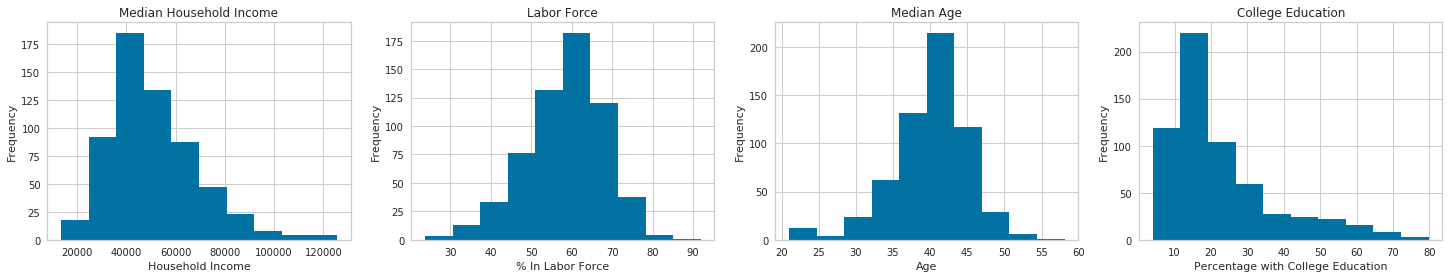

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 4, figsize=(25,4))
#fig.subplots_adjust(hspace=.35)

ax1 = census_clust['MEDIAN_HOUSEHOLD_INCOME'].plot(kind='hist', ax=ax[0])
ax1.set_title('Median Household Income')
ax1.set_xlabel('Household Income')

ax2 = census_clust['IN_LABOR_FORCE_%'].plot(kind='hist', ax=ax[1])
ax2.set_title('Labor Force')
ax2.set_xlabel('% In Labor Force')

ax3 = census_clust['MEDIAN_AGE'].plot(kind='hist', ax=ax[2])
ax3.set_title('Median Age')
ax3.set_xlabel('Age')

ax4 = census_clust['EDU_BS_OR_AVOVE_%'].plot(kind='hist', ax=ax[3])
ax4.set_title('College Education')
ax4.set_xlabel('Percentage with College Education')

plt.show()

In [21]:
# Scale and transform census clustering dataframe, making ready for clustering algorithms
from sklearn.preprocessing import StandardScaler
import numpy as np

X = census_clust.values
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[ 0.78321487, -1.03633922, -1.24456826, -0.26645594],
       [ 0.58784117, -0.44331197, -0.68340949, -0.08752303],
       [-1.44404533, -1.2474585 , -2.38766945, -0.86519301],
       ...,
       [ 0.91997647, -0.82521995, -1.4731885 ,  0.16023024],
       [-0.44763945, -0.24927717, -0.53792388, -0.38345054],
       [ 0.74414013,  0.55128442,  0.2414633 , -0.72755231]])

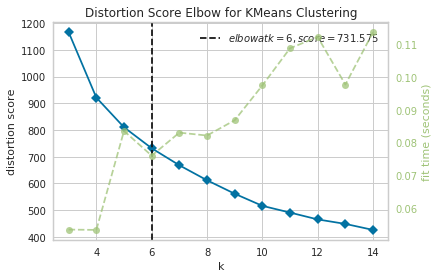

In [22]:
#!pip install yellowbrick
# Use elbow method to find best K for K means clustering
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<div style="margin: 0 auto; width:1000px;">
    <p>
        Although a clear 'elbow' is not identified here, we see 6 is returned as the optimal value of K, giving us the best balance of distorion score with time taken to fit the model.  We will use this K value of 6 to now fit our K Means model and cluster our 306 zip codes into 6 individual clusters based on our selected demographics.  We will then analyze the clusters to see their identifying characteristics, attempting then to name the clusters so they are useful once we combine them with our venue data from Foursquare.
    </p>
</div>

In [23]:
# Fit our model using K Means clustering
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

# Produce cluster labels
labels = kmeans.labels_
print(f'{len(labels)} items have been clustered with a sampling of the first 10 items following:\n{labels[:10]}')

602 items have been clustered with a sampling of the first 10 items following:
[0 3 0 0 0 0 3 0 3 3]


In [24]:
# Add column to census data frame to store cluster label
census_df['CLUSTER'] = labels
census_df[['ZIP','CITY','STATEID','CLUSTER']].head(5)

,ZIP,CITY,STATEID,CLUSTER
0,24701,Bluefield,WV,0
1,24740,Princeton,WV,3
2,24747,Rock,WV,0
3,24801,Welch,WV,0
4,24870,Oceana,WV,0


In [25]:
# Limit back to the columns we clustered on and look for defining characteristics of each cluster
result_df = census_df[['CLUSTER','MEDIAN_AGE','MEDIAN_HOUSEHOLD_INCOME','IN_LABOR_FORCE_%','EDU_BS_OR_AVOVE_%']]
result_df.groupby('CLUSTER').mean()

,MEDIAN_AGE,MEDIAN_HOUSEHOLD_INCOME,IN_LABOR_FORCE_%,EDU_BS_OR_AVOVE_%
CLUSTER,,,,
0,42.065854,34005.967480,44.665854,11.996748
1,37.860714,84606.571429,71.235714,56.862500
2,40.625472,66521.773585,66.051887,30.488679
3,43.161905,48814.539683,57.378307,16.648148
4,36.255446,42962.336634,61.782178,16.793069
5,26.477778,36458.296296,60.507407,29.396296


<div style="margin: 0 auto; width:1000px;">
    <p>
        Now that we have the cumminities clustered, let's see how many communities fall into each cluster.  Later, we will visualize these on a map for even better interpretation.
    </p>
</div>

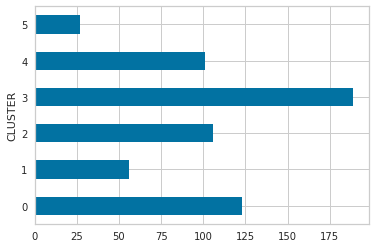

In [26]:
# See how many zip codes fall into each cluster
result_df.groupby('CLUSTER')['MEDIAN_AGE'].count().plot(kind='barh')

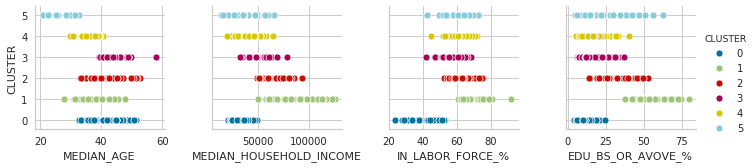

In [27]:
# Utilize variation of a pairplot to look at each variable and where they fall by cluster
import seaborn as sns
sns.pairplot(data=result_df, hue='CLUSTER', y_vars=['CLUSTER'], x_vars=result_df.columns[1:])

<div style="margin: 0 auto; width:1000px;">
    <p>
        We've now clusterd our community zip codes into 6 distinct groups, with defining characteristcs as seen above.  Let's name each cluster and add the cluster name back to our data frame so we have a more meaningful way of looking at our community zip codes.  Below are named clusters in descending order based on the number of zip codes in each.
    </p>
        <ul>
            <li>Cluster 3: Older, Employed, Lower Educated, Middle Income</li>
            <li>Cluster 0: Middle Aged, Unemployed, Uneducated, Low Income</li>
            <li>Cluster 2: Middle Aged, Employed, Educated, Higher Income</li>
            <li>Cluster 4: Younger, Employed, Lower Educated, Low Income</li>
            <li>Cluster 1: Middle Aged, Highly Employed, Highly Educated, High Income</li>
            <li>Cluster 5: Young, Employed, Lower Educated, Low Income</li>
        </ul>
    <p>
        Now that we have our cluster names, let's assign them as a column in our census data frame.
    </p>
</div>

In [59]:
# Load cluster names to variables
three='Older, Employed, Lower Educated, Middle Income'
zero='Middle Aged, Unemployed, Uneducated, Low Income'
two='Middle Aged, Employed, Educated, Higher Income'
four='Younger, Employed, Lower Educated, Low Income'
one='Middle Aged, Highly Employed, Highly Educated, High Income'
five='Young, Employed, Lower Educated, Low Income'

# Function to return cluster name based on cluster number
def name_cluster(cluster):
    if cluster == 0: return zero
    if cluster == 1: return one
    if cluster == 2: return two
    if cluster == 3: return three
    if cluster == 4: return four
    if cluster == 5: return five

# Loop through rows in census_df and assign names
names = []
for index, row in census_df.iterrows():
    nm = name_cluster(row['CLUSTER'])
    names.append(nm)

# Add results as column in census_df
census_df['CLUS_NAME'] = names
print(census_df.shape)
census_df[['ZIP','CITY','CLUSTER','CLUS_NAME']].head()

(602, 37)


,ZIP,CITY,CLUSTER,CLUS_NAME
0,24701,Bluefield,0,"Middle Aged, Unemployed, Uneducated, Low Income"
1,24740,Princeton,3,"Older, Employed, Lower Educated, Middle Income"
2,24747,Rock,0,"Middle Aged, Unemployed, Uneducated, Low Income"
3,24801,Welch,0,"Middle Aged, Unemployed, Uneducated, Low Income"
4,24870,Oceana,0,"Middle Aged, Unemployed, Uneducated, Low Income"


### Visualize Clustered Zip Codes

<div style="margin: 0 auto; width:1000px;">
    <p>
        With our communities clustered and named, we can now visualize them on our Folium map previewed in our Data Sources discussion above.  We will segregate the six clusters and assign GeoJson dictionary files for each, allowing us to add each of them as separate groups to our Folium map and assess the results.
    </p>
    <p>
        As you will see from the below series of pictures, our clustering offers interesting results and is validated by my knowledge of this tristate area.  The majority of the area is an economically depressed region with below national average income levels and education levels.  This is validated by the two largest clusters belonging to lower-middle-class populations.  The upper-middle and upper class clusters are centralized around the largest city centers of Columbus, Dayton, Cincinnatti, Lexington, and a couple of others, further adding reasonableness and validation to our results.
    </p>
</div>

In [6]:
#!pip install folium
# Import libraries
import pandas as pd
import folium
import json

# Assign variables
clust_df = pd.read_csv(census_clustered)
colors = ['red','blue','green','brown','orange','purple']
lgd_txt = '<span style="color: {col};">{txt}</span>'

# Load GeoJson
with open(final_geo) as f:
    data = json.load(f)

# Create Folium map
f = folium.Figure(width=800, height=600)
map = folium.Map(location=[38.309318,-82.648588], zoom_start=6)

# Add states to map
fg_state = folium.FeatureGroup(name=lgd_txt.format(txt='States', col='black'))
fg_state.add_child(folium.GeoJson(data=geo_kyohwv))
fg_state.add_to(map)

clust0, clust1, clust2, clust3, clust4, clust5 = [], [], [], [], [], []
# Separate GeoJson into each cluster
for i in range(len(data['features'])):
    for index, row in clust_df.iterrows():
        if int(data['features'][i]['properties']['ZCTA5CE10']) == row['ZIP']:
            if row['CLUSTER'] == 0: clust0.append(data['features'][i])
            if row['CLUSTER'] == 1: clust1.append(data['features'][i])
            if row['CLUSTER'] == 2: clust2.append(data['features'][i])
            if row['CLUSTER'] == 3: clust3.append(data['features'][i])
            if row['CLUSTER'] == 4: clust4.append(data['features'][i])
            if row['CLUSTER'] == 5: clust5.append(data['features'][i])

# Rebuild separate GeoJson dictionaries for each cluster
clust0geo = dict.fromkeys(['type','features'])
clust1geo = dict.fromkeys(['type','features'])
clust2geo = dict.fromkeys(['type','features'])
clust3geo = dict.fromkeys(['type','features'])
clust4geo = dict.fromkeys(['type','features'])
clust5geo = dict.fromkeys(['type','features'])

clust0geo['type'] = 'FeatureCollection'
clust1geo['type'] = 'FeatureCollection'
clust2geo['type'] = 'FeatureCollection'
clust3geo['type'] = 'FeatureCollection'
clust4geo['type'] = 'FeatureCollection'
clust5geo['type'] = 'FeatureCollection'

clust0geo['features'] = clust0
clust1geo['features'] = clust1
clust2geo['features'] = clust2
clust3geo['features'] = clust3
clust4geo['features'] = clust4
clust5geo['features'] = clust5

def get_color(feature, col):
    return {'fillOpacity': 0.7,
            'weight': 0.3,
            'fillColor': colors[col]}

# Add Cluster 0 to map
fg_clust0 = folium.FeatureGroup(name=lgd_txt.format(txt='Middle Aged, Unemployed, Uneducated, Low Income', col=colors[0]))
fg_clust0.add_child(folium.GeoJson(data=clust0geo,
                                style_function=lambda x: get_color(x, 0)))
fg_clust0.add_to(map)
# Add Cluster 1 to map
fg_clust1 = folium.FeatureGroup(name=lgd_txt.format(txt='Middle Aged, Highly Employed, Highly Educated, High Income', col=colors[1]))
fg_clust1.add_child(folium.GeoJson(data=clust1geo,
                                style_function=lambda x: get_color(x, 1)))
fg_clust1.add_to(map)
# Add Cluster 2 to map
fg_clust2 = folium.FeatureGroup(name=lgd_txt.format(txt='Middle Aged, Employed, Educated, Higher Income', col=colors[2]))
fg_clust2.add_child(folium.GeoJson(data=clust2geo,
                                style_function=lambda x: get_color(x, 2)))
fg_clust2.add_to(map)
# Add Cluster 3 to map
fg_clust3 = folium.FeatureGroup(name=lgd_txt.format(txt='Older, Employed, Lower Educated, Middle Income', col=colors[3]))
fg_clust3.add_child(folium.GeoJson(data=clust3geo,
                                style_function=lambda x: get_color(x, 3)))
fg_clust3.add_to(map)
# Add Cluster 4 to map
fg_clust4 = folium.FeatureGroup(name=lgd_txt.format(txt='Younger, Employed, Lower Educated, Low Income', col=colors[4]))
fg_clust4.add_child(folium.GeoJson(data=clust4geo,
                                style_function=lambda x: get_color(x, 4)))
fg_clust4.add_to(map)
# Add Cluster 5 to map
fg_clust5 = folium.FeatureGroup(name=lgd_txt.format(txt='Young, Employed, Lower Educated, Low Income', col=colors[5]))
fg_clust5.add_child(folium.GeoJson(data=clust5geo,
                                style_function=lambda x: get_color(x, 5)))
fg_clust5.add_to(map)

# Complete and display map
map.add_child(folium.LayerControl('topleft', collapsed=False))
map.add_to(f)
map

<div style="margin: 0 auto; width:1000px;">
    <p>Added all zip codes into state visualization from avove</p>
    <img src="https://raw.githubusercontent.com/rsq215/Coursera_Capstone/master/maps/states_and_clusters.PNG" width="90%" />
    <p>Remove state outline and focus on zip code boundaries and clusters</p>
    <img src="https://raw.githubusercontent.com/rsq215/Coursera_Capstone/master/maps/clustered_zips.PNG" width="90%" />
    <p>Clearly see upper-middle and upper class communities centered around major cities</p>
    <img src="https://raw.githubusercontent.com/rsq215/Coursera_Capstone/master/maps/clustered_zips_high_income.PNG" width="90%" />
    <p>Majority of tristate area is middle to lower-middle class in a slightly economically depressed region</p>
    <img src="https://raw.githubusercontent.com/rsq215/Coursera_Capstone/master/maps/clustered_zips_middle_class.PNG" width="90%" />
</div>

### Utilize Foursquare API to get Top Venues by Community

<div style="margin: 0 auto; width:1000px;">
    <p>
        Now that we've fully clustered, analyzed, and visualized our zip code communities by socioeconomic status, it's time to move on to the Foursquare API which will allow us to look at the top commercial venues in each community.  From that data, we will look at the top venue choices by category and then cluster our communities a second time based on this venue information.
    </p>
    <p>
        We will start by pulling in all of the raw data and cleaning it up into a data frame for easier use and manipulation.
    </p>
</div>

In [2]:
# Read in our clustered census dataframe for use in looping through communities to pull venue picks fom foursquare
import pandas as pd
census_df = pd.read_csv(census_clustered)
print(f'{census_df.shape[0]} census records loaded from the clustered census data above.')

602 census records loaded from the clustered census data above.


<div style="margin: 0 auto; width:1000px;">
    <p>
        For each zip code community in our census data, we will loop through and make a call to the Foursquare API to return the top 10 "Top Picks" from each community.  We will then look at the venue category types, the frequency with which they appear, and begin to cluster the communities on similar venue category preferences.
    </p>
</div>

In [3]:
import requests
import numpy as np
# Create function to pull back top venue choices for each community in the census dataframe
def top_picks(loczips, loccities, locstates, limit=10):
    ''' Accept series of zip codes, cities, and states - return top [LIMIT] venues in that community from Foursquare API '''
    venues_list = []
    # Loop through each location and build venues list of results
    for loczip, loccity, locstate in zip(loczips, loccities, locstates):
        try:
            loc = f'{loccity} {locstate}'
            url = f'https://api.foursquare.com/v2/venues/search?client_id={client_id}&client_secret={client_secret}&v={version}&near={loc}&limit={limit}&q=Top Picks'
            results = requests.get(url).json()['response']['venues']

            # Gather relavant columns for data frame
            for v in results:
                try:
                    venues_list.append([(
                        loczip,
                        loccity,
                        locstate,
                        v['name'],
                        v['location']['lat'],
                        v['location']['lng'],
                        v['categories'][0]['name'],
                        v['categories'][0]['shortName']
                    )])
                except IndexError:
                    pass
        except Exception as error:
            pass
        
    # Build data frame
    venue_df = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venue_df.columns = ['ZIP','CITY','STATEID','VENUE_NAME','LAT','LNG','CATEGORY','CATEGORY_SHORT']
    
    return(venue_df)

In [4]:
venue_df = top_picks(loczips=census_df['ZIP'], loccities=census_df['CITY'], locstates=census_df['STATEID'])
print(f"venue_df contains {venue_df.shape[0]} records and {len(venue_df['CATEGORY'].unique())} unique categories")
print(venue_df.dtypes)
venue_df.sample(10)

venue_df contains 5062 records and 343 unique categories
ZIP                 int64
CITY               object
STATEID            object
VENUE_NAME         object
LAT               float64
LNG               float64
CATEGORY           object
CATEGORY_SHORT     object
dtype: object


,ZIP,CITY,STATEID,VENUE_NAME,LAT,LNG,CATEGORY,CATEGORY_SHORT
971,40069,Springfield,KY,U.S. Bank ATM,37.685268,-85.222115,ATM,ATM
1544,41008,Carrollton,KY,SUBWAY,38.683045,-85.168081,Sandwich Place,Sandwiches
3534,45118,Fayetteville,OH,Pike Street Bar & Grill,39.186374,-83.933557,Pub,Pub
3004,43713,Barnesville,OH,Barnesville Vision Center,39.987479,-81.175748,Optical Shop,Optical
2122,43004,Blacklick,OH,Mcneill Farms Condos,39.986829,-82.806621,Residential Building (Apartment / Condo),Residential
1573,41015,Latonia,KY,Emerson's Bakery,39.048218,-84.502865,Bakery,Bakery
3517,45106,Bethel,OH,Bethel Municipal Building,38.964370,-84.080616,Government Building,Government
703,26181,Washington,WV,Blennerhassett Island Bridge,39.276800,-81.646872,Bridge,Bridge
2608,43160,Washington Court House,OH,Washington Court House Municipal Court,39.536289,-83.440164,Courthouse,Courthouse
185,25213,Winfield,WV,Dollar General,38.534629,-81.893016,Discount Store,Discount Store


In [5]:
venue_df = pd.read_csv(fsq_venues)
venue_df.describe(include='all')

,ZIP,CITY,STATEID,VENUE_NAME,LAT,LNG,CATEGORY,CATEGORY_SHORT
count,5415.000000,5415,5415,5415,5415.000000,5415.000000,5415,5415
unique,NaN,430,3,3164,NaN,NaN,337,334
top,NaN,Cincinnati,OH,US Post Office,NaN,NaN,Gas Station,Gas Station
freq,NaN,440,3137,99,NaN,NaN,246,246
mean,40254.024192,NaN,NaN,NaN,39.048276,-83.160358,NaN,NaN
std,7059.025962,NaN,NaN,NaN,0.904913,1.266069,NaN,NaN
min,24701.000000,NaN,NaN,NaN,36.606300,-85.402689,NaN,NaN
25%,40475.000000,NaN,NaN,NaN,38.390515,-84.303844,NaN,NaN
50%,43123.000000,NaN,NaN,NaN,39.162114,-83.185268,NaN,NaN
75%,45209.000000,NaN,NaN,NaN,39.805712,-82.265338,NaN,NaN


<div style="margin: 0 auto; width:1000px;">
    <p>
        Let's now perform "one hot" encoding on the data set, converting the unique categories to column names and passing 1's and 0's to each column based on whether a zip code has that category in their Top Pick list or not.  A '1' indicates that the category appears in the community results.  A '0' indicates its absence.  By converting to numerical values, we can utilize statistical methods to rank the categories by each community.
    </p>
</div>

In [6]:
# One hot encoding
venue_onehot = pd.get_dummies(venue_df[['CATEGORY']], prefix='', prefix_sep='')
venue_onehot['ZIP'] = venue_df['ZIP']
venue_onehot['CITY'] = venue_df['CITY']
venue_onehot['STATEID'] = venue_df['STATEID']
venue_onehot.sample(10)

,ATM,Acupuncturist,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,...,Vineyard,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio,ZIP,CITY,STATEID
2248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42519,Burnside,KY
1799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41048,Hebron,KY
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25159,Poca,WV
689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26105,Vienna,WV
880,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,26408,Mount Clare,WV
5231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45686,Vinton,OH
3486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,43947,Shadyside,OH
3400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,43822,Frazeysburg,OH
5193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45661,Piketon,OH
3955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45167,Ripley,OH


In [7]:
venue_grouped = venue_onehot.groupby(['ZIP','CITY','STATEID']).mean().reset_index()
venue_grouped.sample(10)

,ZIP,CITY,STATEID,ATM,Acupuncturist,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vineyard,Warehouse Store,Wine Bar,Wine Shop,Winery,Wings Joint,Yoga Studio
353,43334,Marengo,OH,0.1,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,40508,Lexington,KY,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,43001,Alexandria,OH,0.0,0.0,0.000,0.0,0.0,0.1,0.0,...,0.1,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,26164,Ravenswood,WV,0.0,0.0,0.100,0.1,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,41006,Butler,KY,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,41042,Florence,KY,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,25302,Charleston,WV,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,45065,South Lebanon,OH,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
516,45370,Spring Valley,OH,0.0,0.0,0.125,0.0,0.0,0.0,0.0,...,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,26351,Glenville,WV,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import numpy as np
def return_top_venues(row, num):
    row_cat = row.iloc[3:]
    row_cat_sort = row_cat.sort_values(ascending=False)
    return row_cat_sort.index.values[0:num]

num = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZIP','CITY','STATEID']
for ind in np.arange(num):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

venues_sort = pd.DataFrame(columns=columns)
venues_sort['ZIP'] = venue_grouped['ZIP']
venues_sort['CITY'] = venue_grouped['CITY']
venues_sort['STATEID'] = venue_grouped['STATEID']

for ind in np.arange(venue_grouped.shape[0]):
    venues_sort.iloc[ind, 3:] = return_top_venues(venue_grouped.iloc[ind, 3:], num)

print(f'venues_sort as {venues_sort.shape[0]} rows.')
venues_sort.sample(10)

venues_sort as 598 rows.


,ZIP,CITY,STATEID,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
291,43076,Thornville,OH,Bank,Post Office,Tanning Salon,City Hall,Pizza Place,Strip Club,Discount Store,Distillery,Distribution Center,Dive Bar
591,45760,Middleport,OH,Big Box Store,Preschool,Fast Food Restaurant,Moving Target,Bakery,Castle,Discount Store,Park,Automotive Shop,Yoga Studio
329,43212,Columbus,OH,Capitol Building,Government Building,History Museum,Gift Shop,Yoga Studio,Diner,Discount Store,Distillery,Distribution Center,Dive Bar
469,45227,Cincinnati,OH,Business Center,Gym / Fitness Center,Office,Doctor\'s Office,Fire Station,Middle School,Pharmacy,Financial or Legal Service,Police Station,Bus Stop
473,45232,Cincinnati,OH,Business Center,Gym / Fitness Center,Office,Doctor\'s Office,Fire Station,Middle School,Pharmacy,Financial or Legal Service,Police Station,Bus Stop
584,45710,Albany,OH,Post Office,Automotive Shop,Office,Diner,Discount Store,Bank,Gas Station,High School,Emergency Room,Distribution Center
292,43078,Urbana,OH,Boutique,Auto Workshop,Tech Startup,Bar,Candy Store,Gift Shop,Italian Restaurant,Distribution Center,Dive Bar,Doctor\'s Office
45,25526,Hurricane,WV,Automotive Shop,Post Office,Comfort Food Restaurant,Pharmacy,Coffee Shop,Salon / Barbershop,Church,Bakery,Miscellaneous Shop,Gun Shop
71,25976,Meadow Bridge,WV,Discount Store,High School,Hardware Store,Movie Theater,Bridge,Moving Target,Drugstore,Distillery,Distribution Center,Dive Bar
75,26104,Parkersburg,WV,Gas Station,Theater,Church,Bar,Bank,Park,Furniture / Home Store,Bus Station,Convenience Store,Doctor\'s Office


### Cluster Communities by Venue Choices

<div style="margin: 0 auto; width:1000px;">
    <p>
        To begin clustering, we'll use our grouped data frame showing the mean value of each venue category by zip.  We'll drop the columns for zip, city, and state so that we are left only with numerical columns for each venue category type.  We will again use the elbow method to identify the best k for k-means clustering on our data.
    </p>
</div>

In [10]:
venue_clusters = venue_grouped.drop(['ZIP','CITY','STATEID'], 1)

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


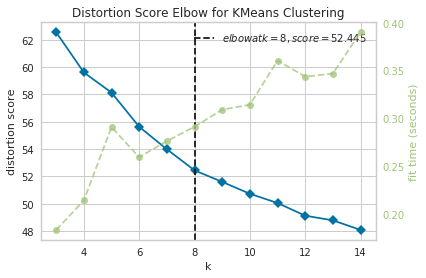

In [12]:
#!pip install yellowbrick
# Use elbow method to find best K for K means clustering
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15))

visualizer.fit(venue_clusters)        # Fit the data to the visualizer
visualizer.show()                     # Finalize and render the figure

<div id="results"><h1>III. Results</h1></div>

<div id="discussion"><h1>IV. Discussion</h1></div>

<div id="conclusion"><h1>V. Conclusion</h1></div>

<div id="references"><h1>VI. References</h1></div>

1. [ProCon: US Obesity Levels by State](https://obesity.procon.org/us-obesity-levels-by-state/)
2. [FourSquare API](https://developer.foursquare.com/)
3. [Census.gov API](https://www.census.gov/data/developers/data-sets/acs-5year.html)
4. [OpenDataDE Zip Code Level GeoJSON](https://github.com/OpenDataDE/State-zip-code-GeoJSON)